## HABUMUGISHA Emmanuel
 ### 225229109

# Exploration of DNN design choices using MNIST dataset

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from keras.datasets import mnist

from keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout

from keras import regularizers

from sklearn.model_selection import train_test_split

#### Import dataset

In [2]:
data = mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


#### Printing some training images

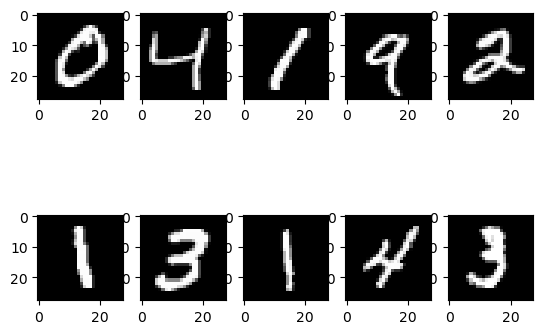

In [5]:
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

#### Flatten the data

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

#### Normalize the data

In [7]:
X_train = X_train / 255
X_test = X_test / 255

# Exploration

In [8]:
def model(nodes, layers, activation_in, activation_out, loss, optimizer, metrics, epochs, X_train, y_train, X_test, y_test):

    model = Sequential()
    
    model.add(Dense(nodes, input_dim=28*28, activation=activation_in))
    
    for x in range(layers):
        model.add(Dense(nodes, activation=activation_in))

    model.add(Dense(10, activation=activation_out))

    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    model.fit(X_train, to_categorical(y_train), epochs=epochs)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

# 1. No. of Nodes

In [9]:
model1 = model(4, 0, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.8747 - accuracy: 0.7347
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5726 - accuracy: 0.8318
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5307 - accuracy: 0.8453
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5089 - accuracy: 0.8528
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4931 - accuracy: 0.8578
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4814 - accuracy: 0.8616
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4718 - accuracy: 0.8648
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4654 - accuracy: 0.8679
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4587 - accuracy: 0.8697
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.4555 

# 2. No. of Layers

In [10]:
model7 = model(32, 3, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3426 - accuracy: 0.8974
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1644 - accuracy: 0.9509
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1317 - accuracy: 0.9599
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1114 - accuracy: 0.9662
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0965 - accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0867 - accuracy: 0.9733
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0777 - accuracy: 0.9754
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0697 - accuracy: 0.9783
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0648 - accuracy: 0.9797
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.0985 

# 3. Activation Function

In [11]:
model11 = model(32, 2, 'sigmoid','softmax','categorical_crossentropy','Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9371 - accuracy: 0.7414
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2777 - accuracy: 0.9249
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1978 - accuracy: 0.9437
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1593 - accuracy: 0.9540
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1352 - accuracy: 0.9612
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1190 - accuracy: 0.9650
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1069 - accuracy: 0.9692
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0967 - accuracy: 0.9722
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0892 - accuracy: 0.9743
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1239 

# 4. Activation Function combinations

In [12]:
def model_afc(activation1, activation2, activation3):

    model = Sequential()

    model.add(Dense(32, input_dim=28*28, activation=activation1))

    model.add(Dense(32, activation=activation2))

    model.add(Dense(32, activation=activation2))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [13]:
model14 = model_afc('sigmoid','relu','tanh')

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4497 - accuracy: 0.8686
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1932 - accuracy: 0.9430
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1478 - accuracy: 0.9560
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1231 - accuracy: 0.9624
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1052 - accuracy: 0.9686
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0932 - accuracy: 0.9714
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0829 - accuracy: 0.9740
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0739 - accuracy: 0.9772
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0671 - accuracy: 0.9787
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1226 

# 5. Layer-node combinations

In [14]:
model17 = model(32, 1, 'relu', 'softmax', 'categorical_crossentropy', 'Adam', 'accuracy', 10, X_train, y_train, X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.3439 - accuracy: 0.9021
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1719 - accuracy: 0.9495
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1350 - accuracy: 0.9595
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1140 - accuracy: 0.9650
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0987 - accuracy: 0.9702
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9733
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0806 - accuracy: 0.9749
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0724 - accuracy: 0.9775
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9787
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1159 

# 6. Optimizer

In [15]:
def model_opt(optimizer):

    model = Sequential()

    model.add(Dense(32, input_dim=28*28, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [16]:
model20 = model_opt('SGD')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8678 - accuracy: 0.7385
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3378 - accuracy: 0.9022
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2710 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2309 - accuracy: 0.9325
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2020 - accuracy: 0.9412
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1809 - accuracy: 0.9472
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1648 - accuracy: 0.9517
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1524 - accuracy: 0.9552
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1419 - accuracy: 0.9588
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1399 

# 7. L1, L2 Regularization

In [17]:
def model_reg(reg):

    model = Sequential()

    model.add(Dense(128, input_dim=28*28, activation='relu', kernel_regularizer=reg))

    model.add(Dense(128, activation='relu', kernel_regularizer=reg))

    model.add(Dense(128, activation='relu', kernel_regularizer=reg))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [18]:
model23 = model_reg(regularizers.l1(0.01))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.8071 - accuracy: 0.1185
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.4609 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4608 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4606 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4606 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4606 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4606 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4606 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.4606 - accuracy: 0.1124
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.4603 

In [19]:
model25 = model_reg(regularizers.l2(0.01))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9890 - accuracy: 0.8908
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5724 - accuracy: 0.9226
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5023 - accuracy: 0.9323
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4591 - accuracy: 0.9380
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4294 - accuracy: 0.9428
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4104 - accuracy: 0.9431
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3922 - accuracy: 0.9465
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3823 - accuracy: 0.9472
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3736 - accuracy: 0.9473
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.3518 

# 8. Dropout Regularization

In [20]:
def model_dropout(rate):

    model = Sequential()

    model.add(Dense(128, input_dim=28*28, activation='relu'))
    model.add(Dropout(rate))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

In [21]:
model29 = model_dropout(0.5)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6404 - accuracy: 0.7991
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3389 - accuracy: 0.9071
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2839 - accuracy: 0.9223
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2556 - accuracy: 0.9301
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2421 - accuracy: 0.9340
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2281 - accuracy: 0.9384
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2212 - accuracy: 0.9398
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2116 - accuracy: 0.9428
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2059 - accuracy: 0.9439
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.1086 

# 9. Input Size

In [22]:
def model_input_dim(input_dim):

    model = Sequential()

    model.add(Dense(128, input_dim=input_dim, activation='relu'))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

    model.fit(X_train, to_categorical(y_train), epochs=10)

    score = model.evaluate(X_test, to_categorical(y_test))

    print(model.summary(), "\n", "Accuracy =", score[1]*100)

# 10. Dataset Split

In [23]:
(X_train, y_train), (X_test, y_test) = data
X1 = np.concatenate((X_train, X_test))
y1 = np.concatenate((y_train, y_test))

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.7, random_state=42)

In [28]:
model33 = Sequential([Dense(32, input_dim=28*28, activation='relu'), 
                      Dense(32, activation='relu'), 
                      Dense(32, activation='relu'), 
                      Dense(10, activation='softmax')]) 
model33.compile(loss='mean_squared_error', optimizer='Adam', metrics='accuracy')
model33.fit(X_train1, y_train1, epochs=10) 
score33 = model33.evaluate(X_test1, y_test1)
print(model33.summary(), "\n", "Accuracy =", score33[1]*100)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\ISHIMWE K AHMED\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ISHIMWE K AHMED\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ISHIMWE K AHMED\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ISHIMWE K AHMED\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ISHIMWE K AHMED\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ISHIMWE K AHMED\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_13" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28, 28)
